## <font color='blue'>Correlação entre Valor do Aluguel e Área do Imóvel por Regressão Linear Usando Statsmodels</font>

## <font color='blue'>Análise Estatística com Statsmodels</font>

<h2><font color = 'blue'>Objetivo</font></h2>

<b>O projeto possui como objetivo o treinamento nas bibliotecas como pandas, matplotlib, seaborn e statsmodels. Os dados explorados são dados relativos ao valor dos alugueis de moradias, o respectivo número de banheiros, quartos e a localidade. O problema de negócio proposto é a correlação entre a área do imóvel e seu valor de aluguel. Para avaliar tal relação, foi utilizada a regressão linear como o método para tentar demonstrar alguma tendência. A ideia do projeto tem origem em uma aula do curso da Data Science Academy.</b>

<h2><font color = 'blue'>Ferramentas Utilizadas</font></h2>

<b><li>Python 3.10.13<li>Pandas<li>Matplotlib<li>Seaborn<li>Datetime</b>

<h2><font color = 'blue'>Desenvolvimento</font></h2>

<b>Problema de Negócio:
</b>
<b>Existe alguma relação entre a área de imóveis (em metros quadrados) e o valor do aluguel em uma determinada cidade? Caso exista relação, como podemos mensurá-la?</b>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.13


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Carregando os Dados

In [3]:
df_dsa = pd.read_csv('dataset.csv')

<b>Verificando a quantidade de linhas e colunas presentes na tabela.</b>

In [7]:
df_dsa.shape

(3000, 7)

In [8]:
# Avaliando as colunas presentes
df_dsa.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [20]:
# Mostrando as 5 primeiras linhas
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [7]:
# Apresentando a quantidade de valores não nulos e o tipo de cada dado
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


## Análise Exploratória

<b>Foi realizada uma busca por informações iniciais relevantes nos dados, para isso foi tomada uma análise estatística geral. No entanto, como todos os dados tinham o tipo numérico (int ou float), então o pandas realizou a descrição estatística para todas as colunas, mas realizar um resumo estatístico para a coluna "codigo_bairro" não há qualquer sentido.</b>

In [9]:
# Descrevendo estatisticamente os dados
df_dsa.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


<b>Como a pergunta de negócio foi direcionada ao valor do aluguel do imóvel, o foco será nessa variável.</b>

In [10]:
# Resumo estatístico da variável alvo
df_dsa["valor_aluguel"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<b>Com essas informações, observou-se que o valor do aluguel teve a maioria dos seus valores próximos a 459, que foi a média obtida. Outro ponto importante foi avaliar os quartis. O valor mínimo do aluguel foi de 40, a mediana foi de 426 e o máximo de 1843. Com esses dados, deu para entender como os valores estavam dispostos, mas para ter uma visualização melhor, foi realizada um plotagem em um histograma, pois o valor do aluguel é uma variável contínua.</b>

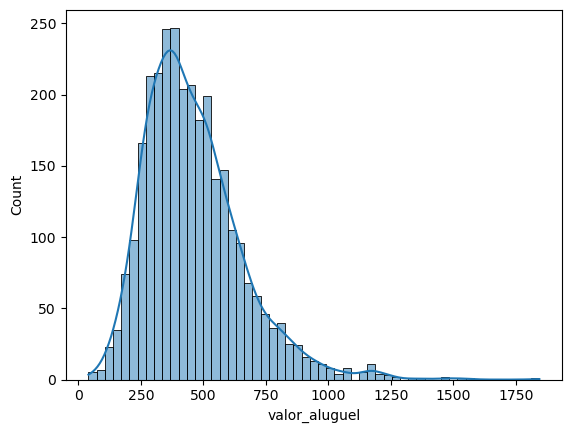

In [46]:
# Histograma da variável alvo
k = sns.histplot(data = df_dsa, x = "valor_aluguel", kde = True)

<b>Conforme o que havia sido observado no resumo estatístico, pôde ser observado que a maioria dos valores estavam próximos à média, por volta de 400.

Como o método escolhido para avaliar uma tendência nos valores foi a regressão linear, foi realizada uma avaliação da correlação entre cada variável. Esse parâmetro especifica se cada par de varáveis avaliadas juntas possuem algum tipo de relação. Esse valor está entre -1 e 1. Para valores mais próximo de -1, há uma correlação inversamente proporcional, se for mais próximo de 1, é diretamente proporcional. Por último, se o valor tender a 0, isso significa que há quase nenhuma correlação entre as variáveis avaliadas.

Como a variável alvo escolhida foi o valor do aluguel, percebe-se que o par que possui melhor correlação com o aluguel é a área em m² do imóvel. Para verificar a disposição dos dados segundo as duas variáveis, é realizado uma plotagem scatter.</b>

In [12]:
# Correlação entre as variáveis
df_dsa.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: title={'center': 'Correlação de Pearson'}>

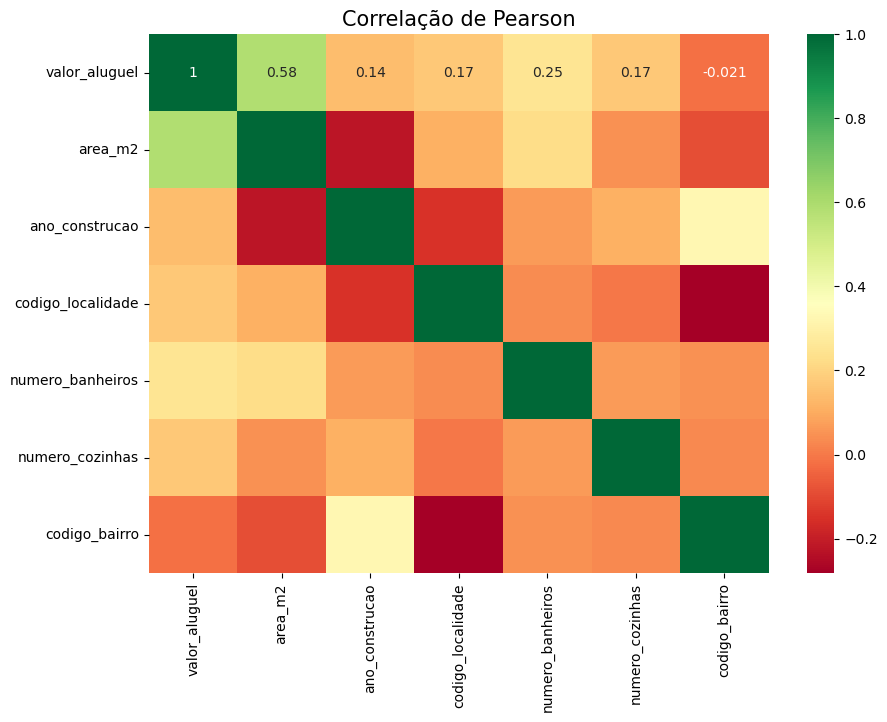

In [68]:
plt.figure(figsize=(10,7))
plt.title('Correlação de Pearson',size=15)
sns.heatmap(df_dsa.corr(), annot = True, cmap= "RdYlGn")

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

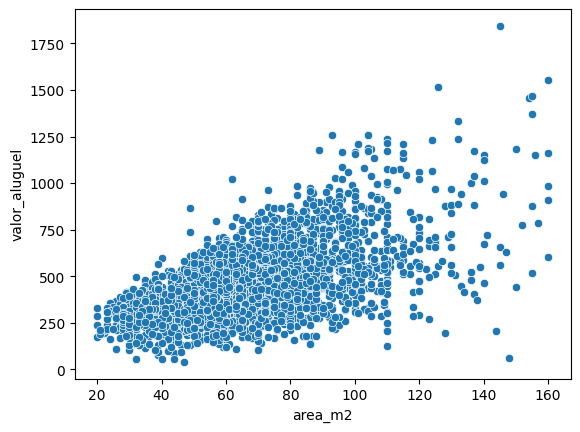

In [13]:
# Vamos analisar a relação entre a variável de entrada area_m2 e a variável alvo valor_aluguel
sns.scatterplot(data = df_dsa, x = "area_m2", y = "valor_aluguel")

<b>Como pode ser visto acima, pôde-se concluir que havia realmente algum tipo de correlação entre essas variáveis. Conforme a área do imóvel aumenta, mais o valor do aluguel tende a subir. No entanto, há alguns pontos fora da curva, que poderiam ser tratados utilizando algumas formas de exclusão de outliers para tentar melhorar o processo de regressão que foi realizado.</b>

<b>Para avaliar a segunda variável com maior correlação, ou seja, o número de banheiros, escolheu-se uma plotagem do tipo violin, essa plotagem apresenta a densidade de distribuição dos valores encontrados. Percebeu-se que o valor do aluguel tende a aumentar com o aumento do número de banheiros, pois valores de aluguel maiores podem ser encontrados no segundo gráfico. Além disso, o máximo de densidade foi deslocado para um valor um pouco maior de aluguel.</b>

[Text(0.5, 0, 'Número de Banheiros'), Text(0, 0.5, 'Valor do Aluguel')]

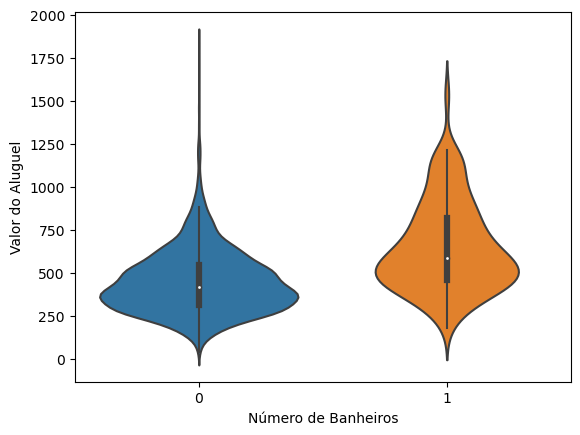

In [16]:
x = sns.violinplot(data=df_dsa, x="numero_banheiros", y="valor_aluguel")
x.set(xlabel ="Número de Banheiros", ylabel = "Valor do Aluguel")

<b>Por último, foi realizada uma plotagem do gráfico com as variáveis valor do aluguel e ano da construção. Essas variáveis poderiam ser utilizadas para realizar uma futura série temporal para avaliar a tendência nos alugueis dos imóveis, conforme os anos vão avançando.</b>

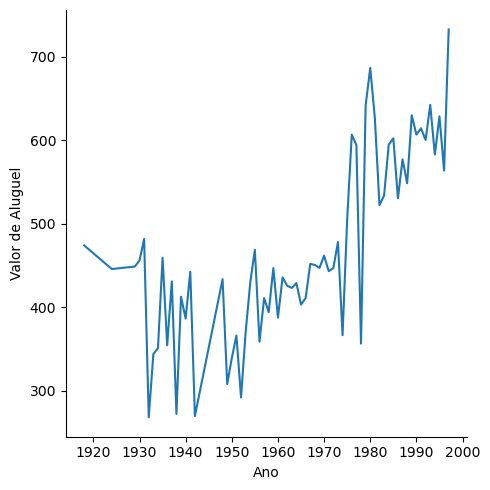

In [49]:
d1 = df_dsa.groupby('ano_construcao')['valor_aluguel'].mean()
d2 = d1.reset_index()
b = sns.relplot(data=d2,kind='line', x = 'ano_construcao', y = 'valor_aluguel')
b.set(xlabel='Ano',ylabel='Valor de Aluguel')

## Construção do Modelo dos Mínimos Quadrados ou OLS (Ordinary Least Squares)

<b>O modelo dos Mínimos Quadrados ou OLS é chamado costumeiramente de regressão linear, pois ele tenta buscar uma tendência linear entre as variáveis, isto é, esse método tenta encontrar alguma natureza linear existente entre os dados, seja de crescimento ou decrescimento.</b>

<b>Como a variável alvo escolhida foi o valor do aluguel, ela foi utilizada como variável dependente e a variável área em m² como variável independente, pois, por meio de um dado valor de área, pretendeu-se encontrar uma predição para o valor do aluguel.</b>

In [69]:
# Definimos a variável dependente
y = df_dsa["valor_aluguel"]
# Definimos a variável independente
X = df_dsa["area_m2"]

In [70]:
# O Statsmodels requer a adição de uma constante à variável independente para se ter o "intercept" do modelo
X = sm.add_constant(X)

In [71]:
# Criamos o modelo
modelo = sm.OLS(y, X)
# Treinamento do modelo
resultado = modelo.fit()

In [73]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.84e-275
Time:                        14:33:21   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

<b>Esse relatório do modelo apresenta algumas informações que devem ser observadas para verificar o quanto o modelo se encaixa para tentar prever a correlação entre as variáveis. O "No. Observations" serve para mostrar a quantidade de valores que o modelo utilizou para ser treinado. "Df Residuals" apresenta a quantidade de graus de liberdade do modelo, que é calculado pelo número de observações subtraído do número de variáveis observadas subtraído pelo número 1. "Df Model" representa o número de variáveis independentes. O "Covariance Type" verifica como duas variáveis estão estão ligadas. Um modelo de covariância robusto realizaria a eliminação ou a minimização de alguma variável. O "R-Squared" é o valor do R², que já foi abordado anteriormente neste projeto. Ele diz o quanto o modelo consegue explicar o padrão dos dados. O valor obtido significa que o modelo consegue explicar 34.2% dos valores. Quanto mais próximo de 1, mais o modelo se encaixa para predizer o padrão existente nos dados avaliados. O "F-statistic" é um teste para verificar se o modelo criado possui pode ser comparável a um modelo que a variável possui nenhum efeito sobre a variável alvo. Como para esse método, é necessária a avaliação de uma Tabela F, pode-se avaliar a probabilidade do "F-statistic" realizado, que é apresentado na linha abaixo. O "Prob (F-statistic)" diz que há uma probabilidade de 6.84e-275 % da variável ter um efeito nulo. O "Log-Likelihood" serve para dizer o quanto um modelo se encaixa em predizer os dados fornecidos. Esse parâmetro é essencial para comparar diferentes modelos e assim escolher o melhor modelo de regressão linear para cada caso. O "AIC" e o "BIC" também são parâmetros utilizados para avaliar a acurácia de um modelo de regressão linear e assim utilizar a melhor escolha. 

O "coef", em "const", diz qual o valor do intercepto para o modelo, "std err" é o valor do erro do desvio padrão. Um baixo valor de "std err" dá um valor pequeno de "t" que significa uma alta correlação entre o modelo e os dados apresentados. O "P>t" é importante para dizer a probabilidade que o modelo tem de descrever a tendência dos dados analisados. Um valor baixo significa que é baixa a probailidade da variável não apresentar nenhum efeito sobre a variável dependente. O "[0.025 0.975]" é interpretado que valores de coeficiente fora do intervalo de 116.541 e 150.856 podem ser considerados outliers. Para a "area_m2", diz a mesma interpretação para como os valores de "area_m2" se correlacionam com o modelo predito. "coef" diz que para cada 1 m² alterado, o valor do aluguel tende a subir 4.8386.

"Omnibus" descreve o quanto a distribuição dos dados se compara com uma distribuição normal. Quanto mais próximo de 0, mais se aproxima da uma curva normal. O "Prob(Omnibus)" diz o valor de probabilidade que existe para os dados terem uma distribuição normal. Quanto mais próximo de 1, maior a probabilidade de possuírem uma distribuição normal. "Skew" está relacionado a simetria dos dados. Quanto mais próximo de 0, mais os dados estão disposto de forma simétrica. "Kurtosis" está relacionado a como os dados estão dispostos se a distribuição fosse normal. Quanto maior esse valor, uma menor quantidade de outliers está presente. "Durbin-Watson" está relacionado a como o erro aumenta na predição, conforme o valor vai aumentando. Os valores ideais seriam entre 1 e 2. Como o valor está acima diz, isso quer dizer que quanto mais aumenta o valor da variável m² do imóvel, mais o erro em predizer o valor do aluguel aumenta. "Jarque-Bera (JB)" e "Prob(JB)" servem para mostrar os mesmos dados obtidos em "Omnibus" e "Prob(Omnibus)". Eles são utilizados para confirmar os dados do "Omnibus". Por último, o "Cond. No." serve para dizer o quanto o método é sensível a mudanças nos dados. Se comparado com outro modelo com valor maior de "Cond. No.", o modelo com valor menor seria considerado melhor.</b>

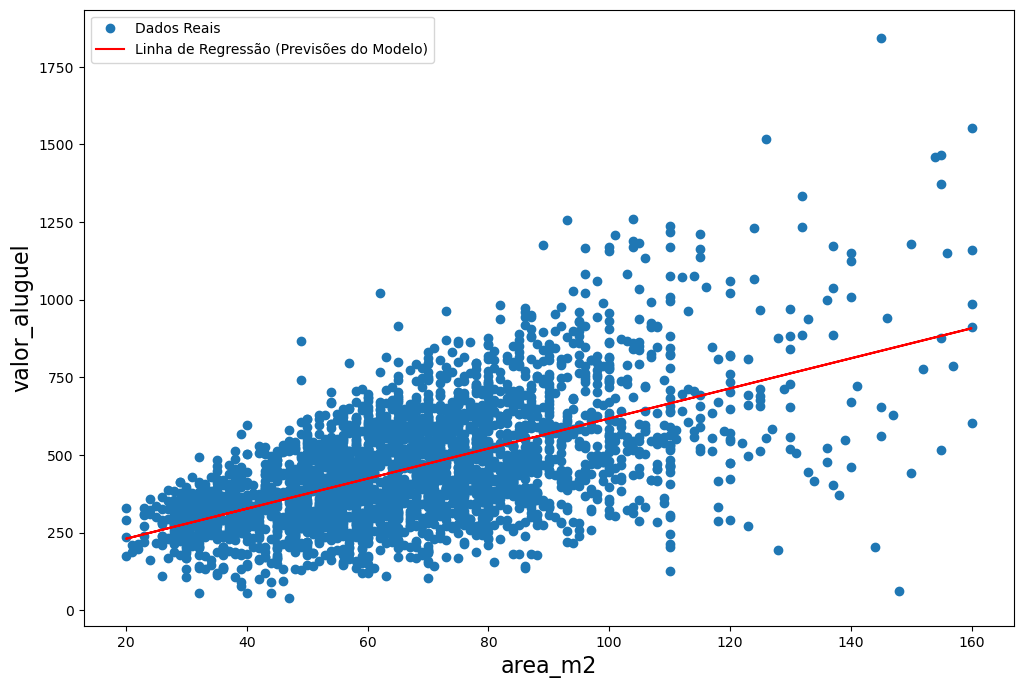

In [28]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel("area_m2", size = 16)
plt.ylabel("valor_aluguel", size = 16)
plt.plot(X["area_m2"], y, "o", label = "Dados Reais")
plt.plot(X["area_m2"], resultado.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.legend(loc = "best")
plt.show()

## <b><font color = 'blue'>Conclusão</font></b>

<b>Avaliando o modelo proposto, há uma correlação entre o modelo e os dados analisados. Isso pode ser confirmado pelo relatório do modelo apresentado anteriormente. Conclui-se que o método consegue se encaixar em 34.2% dos dados fornecidos, que os dados apresentados não possuem uma distribuição normal e que não há uma simetria na distribuição dos dados. Como o "P>t" apresentaou um valor 0.000, isso significa que a variável m² tem uma probabilidade baixa de não ter efeito sobre a variável alvo "valor do aluguel".</b>

<b>O ideal seria usar mais variáveis de entrada para construir o modelo a fim de compreender se outros fatores influenciam no valor do aluguel. Como pôde ser visto que o número de banheiros e o ano podem afetar como a variável alvo "valor do aluguel" se comporta.</b>

<b>Está correlação apresentada entre o valor do aluguel e o tamanho do imóvel não necessariamente implica causalidade, apenas apresenta uma tendência de correlação entre esses dois tipos de dados nesse contexto. Outras avaliação e análises são importantes para confirmar uma conclusão de causalidade. </b>